In [79]:
from bravado.client import SwaggerClient
from pprint import pprint

cbioportal = SwaggerClient.from_url('https://www.cbioportal.org/api/api-docs',
                                config={"validate_requests":False,"validate_responses":False})
print(cbioportal)

SwaggerClient(https://www.cbioportal.org/api)


In [136]:
cancer_types = cbioportal.A_Cancer_Types.getAllCancerTypesUsingGET().result()

studies = cbioportal.B_Studies.getAllStudiesUsingGET().result()

print("In total there are {} studies in cBioPortal, spanning {} different types of cancer.".format(
    len(studies),
    len(cancer_types)
))
print(cancer_types[0])
cancerid_cancer= dict()
for cancer in cancer_types: 
    cancerid_cancer[cancer.cancerTypeId]= cancer.name

In total there are 258 studies in cBioPortal, spanning 855 different types of cancer.
TypeOfCancer(cancerTypeId='aa', clinicalTrialKeywords='aggressive angiomyxoma', dedicatedColor='LightYellow', name='Aggressive Angiomyxoma', parent='soft_tissue', shortName='AA')


In [81]:
print(dir(studies[0]))



['allSampleCount', 'cancerType', 'cancerTypeId', 'citation', 'cnaSampleCount', 'completeSampleCount', 'description', 'groups', 'importDate', 'methylationHm27SampleCount', 'miRnaSampleCount', 'mrnaMicroarraySampleCount', 'mrnaRnaSeqSampleCount', 'mrnaRnaSeqV2SampleCount', 'name', 'pmid', 'publicStudy', 'rppaSampleCount', 'sequencedSampleCount', 'shortName', 'status', 'studyId']


In [82]:
print("The total number of samples in all studies is: {}".format(sum([x.allSampleCount for x in studies])))

The total number of samples in all studies is: 78087


In [83]:
patients = cbioportal.C_Patients.getAllPatientsInStudyUsingGET(studyId='msk_impact_2017').result()
print("The msk_impact_2017 study spans {} patients".format(len(patients)))
type(patients)

The msk_impact_2017 study spans 10336 patients


list

In [84]:
# In total there are 258 studies in cBioPortal, spanning 855 different types of cancer.

cancer_study= dict()
study_patient= dict()
study_mol_profile= dict()
study_sample_list= dict()
study_cancer= dict()
for study in studies: 
    ID= study.studyId
    cancer= study.cancerTypeId 
    mol_prolile_list= cbioportal.J_Molecular_Profiles.getAllMolecularProfilesInStudyUsingGET(studyId=ID).result()
    for profile in mol_prolile_list: 
        if profile.datatype== "MAF": 
            mol_profile= profile.molecularProfileId
    sample_lists= cbioportal.E_Sample_Lists.getAllSampleListsInStudyUsingGET(studyId=ID, sortBy= 'category').result()
    study_patient[ID]= cbioportal.C_Patients.getAllPatientsInStudyUsingGET(studyId=ID).result()
    study_mol_profile[ID]= mol_profile
    study_sample_list[ID]= sample_lists[0].sampleListId
    study_cancer[ID]= cancer 
    if cancer in cancer_study: 
        cancer_study[cancer].append(ID)
    else: 
        cancer_study[cancer]= [ID]
print(len(cancer_study)) 
print(len(study_patient))
print(len(study_mol_profile))
print(len(study_sample_list))
print(len(study_cancer))

84
258
258
258
258


In [85]:
print(cancer_study.keys())


dict_keys(['bll', 'chol', 'nhl', 'coadread', 'dlbclnos', 'escc', 'hnsc', 'hcc', 'um', 'urcc', 'egc', 'nbl', 'npc', 'tet', 'mds', 'nsclc', 'panet', 'plmeso', 'pact', 'prad', 'past', 'mbl', 'ccrcc', 'cllsll', 'blca', 'liad', 'luad', 'ucec', 'breast', 'soft_tissue', 'utuc', 'ampca', 'brca', 'es', 'sclc', 'nccrcc', 'stad', 'mixed', 'aml', 'skcm', 'ucs', 'acyc', 'vsc', 'esca', 'paac', 'rms', 'pcnsl', 'pcm', 'mrt', 'gbc', 'acc', 'angs', 'bfn', 'hdcn', 'cesc', 'cscc', 'desm', 'mbn', 'chrcc', 'gbm', 'difg', 'prcc', 'lung', 'paad', 'mcl', 'mel', 'mnet', 'scco', 'nsgct', 'thpa', 'thym', 'thyroid', 'uccc', 'lusc', 'wt', 'mpnst', 'acbc', 'hgsoc', 'testis', 'odg', 'bcc', 'mnm', 'coad', 'mpn'])


In [86]:
mol_profiles = cbioportal.J_Molecular_Profiles.getAllMolecularProfilesInStudyUsingGET(studyId='msk_impact_2017').result()


print(len(mol_profiles), type(mol_profiles))
mol_profiles[1].molecularProfileId



2 <class 'list'>


'msk_impact_2017_mutations'

In [87]:
# sample_lists = cbioportal.E_Sample_Lists.getAllSampleListsInStudyUsingGET(studyId='msk_impact_2017', sortBy= 'category').result()

# print(len(sample_lists), type(sample_lists))
# print(sample_lists[0])
# for sample in sample_lists: 
#     print(sample.category)
#     print(sample.sampleCount)

In [91]:
mutations = cbioportal.K_Mutations.getMutationsInMolecularProfileBySampleListIdUsingGET(
    molecularProfileId='msk_impact_2017_mutations',
    sampleListId='msk_impact_2017_all',
    entrezGeneId= 7157,
    projection='DETAILED'
).result()

print(len(mutations), type(mutations))
print(mutations[0])

4985 <class 'list'>
Mutation(aminoAcidChange=None, center='NA', driverFilter='', driverFilterAnnotation='', driverTiersFilter='', driverTiersFilterAnnotation='', endPosition=7579591, entrezGeneId=7157, fisValue=1.4013e-45, functionalImpactScore='[Not Available]', gene=Gene(chromosome='17', cytoband='17p13.1', entrezGeneId=7157, hugoGeneSymbol='TP53', length=19149, type='protein-coding'), keyword='TP53 truncating', linkMsa='[Not Available]', linkPdb='[Not Available]', linkXvar='[Not Available]', molecularProfileId='msk_impact_2017_mutations', mutationStatus='NA', mutationType='Frame_Shift_Ins', ncbiBuild='GRCh37', normalAltCount=None, normalRefCount=None, patientId='P-0004753', proteinChange='L35Pfs*10', proteinPosEnd=33, proteinPosStart=32, referenceAllele='NA', refseqMrnaId='NM_001126112.2,NM_001276761.1,NM_001276760.1,NM_000546.5,NM_0011', sampleId='P-0004753-T01-IM5', startPosition=7579590, studyId='msk_impact_2017', tumorAltCount=277, tumorRefCount=297, uniquePatientKey='UC0wMDA0Nz

In [118]:
cancer_mutations= dict()
user_gene= 7157
for ID in study_cancer.keys(): 
    cancer= study_cancer[ID]
    mutation= cbioportal.K_Mutations.getMutationsInMolecularProfileBySampleListIdUsingGET(molecularProfileId= study_mol_profile[ID], sampleListId= study_sample_list[ID] , entrezGeneId= user_gene, projection='DETAILED').result()
    if cancer in cancer_mutations: 
        cancer_mutations[cancer].extend(mutation)
    else: 
        cancer_mutations[cancer]= mutation


In [119]:
print(len(cancer_mutations))

cancer_mut_num= dict()
for cancer in cancer_mutations: 
    cancer_mut_num[cancer]= len(cancer_mutations[cancer])

84


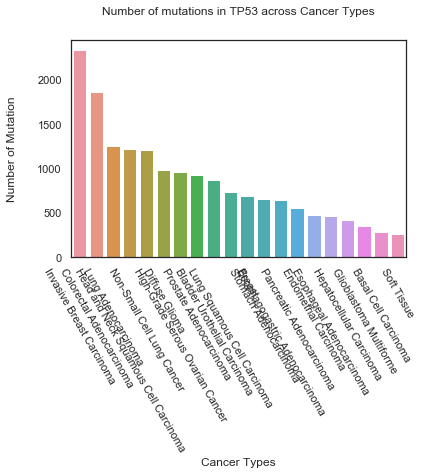

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
x= []
y= []

# for key, value in sorted(cancer_mut_num.iteritems(), key=lambda (k,v): (v,k), reverse=True):
s = [(k, cancer_mut_num[k]) for k in sorted(cancer_mut_num, key=cancer_mut_num.get, reverse=True)]
for k, v in s:
    x.append(cancerid_cancer[k])
    y.append(v)


#     x.append(key)
#     y.append(value)
    
sns.set_style("white")
sns.set_context('notebook')
sns.barplot(x[1:21],y[1:21])

# sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 8})

plt.xticks(rotation=300)
plt.ylabel('Number of Mutation',labelpad=20)
plt.xlabel('Cancer Types')

plt.title('Number of mutations in TP53 across Cancer Types',pad=25)
plt.show()
